# 3 - Ensemble Learning

## 3.2 - Bagging

### Define Base Classifiers

In [6]:
# class for multinomial logistic regression
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
class LogisticRegression:

    def __init__(self,Learning_Rate = 0.05,Epochs= 1000):
        self.Learning_Rate = Learning_Rate
        self.Epochs = Epochs

    def fit(self, X, y):
        losses =[]
        accuracies = []
        accuracies_val = []
        self.classes = np.unique(y)
        self.features = X.shape[1]

        X_without_bias = X

        # add bias term i.e column of ones so that X is of form [1, x1, x2, x3, ...]
        X = np.insert(X, 0, 1, axis=1)

        # initialize weights, which represents contribution of each feature to each class
        self.weights = np.zeros((self.features + 1,len(self.classes))) # (n_features + 1) x n_classes

        # # make sum of weights in every row equal to 1
        # self.weights = self.weights / self.weights.sum(axis=1, keepdims=True)

        # one hot encode the target variable
        encoder = OneHotEncoder()
        encoded_y = encoder.fit_transform(y.reshape(-1, 1)).toarray()

        # print(encoded_y)
        # gradient descent
        loss = 0
        for epoch in range(self.Epochs):

            # calculate probabilities
            z = np.dot(X, self.weights) # (n_examples x n_classes)

            # probs is prob of each class for each example
            probs = self.softmax(z) # (n_examples x n_classes)
            # if epoch % 50 == 0:
            #     loss = self.log_loss(encoded_y, probs)
            #     losses.append([loss,epoch])
            #     acc = self.acc(y, self.predict(X_without_bias))
            #     accuracies.append([acc,epoch])
            #     acc_val = self.acc(y_val, self.predict(X_val_scaled))
            #     accuracies_val.append([acc_val,epoch])
            #     print(f"Loss after epoch {epoch}: {loss}")
            #     print(f"Accuracy after epoch {epoch} : {acc}")
            #     print(f"Accuracy for val set after epoch {epoch} : {acc_val}")
            #     print()
            
            # calculate gradient
            diff_matrix = probs - encoded_y # prob - y
            gradient = np.dot(X.T, diff_matrix)/len(y) # batch gradient descent

            # update weights
            self.weights -= self.Learning_Rate * gradient
        # print()
        # print(f"Loss after all itertions: {loss}")
        # print(f"Accuracy after all iteration : {self.acc(y, self.predict(X_without_bias))}")
        # print(f"Accuracy after all iteration for val set : {self.acc(y_val, self.predict(X_val_scaled))}")
        # losses.append([loss,self.Epochs])
        # accuracies.append([acc,self.Epochs])
        # accuracies_val.append([acc_val,self.Epochs])
        return self

    def predict(self, X):
        # add bias term i.e column of ones so that X is of form [1, x1, x2, x3, ...]
        X = np.insert(X, 0, 1, axis=1)

        # calculate probabilities
        z = np.dot(X, self.weights)
        probs = self.softmax(z)

        # return class with highest probability
        return self.classes[np.argmax(probs, axis=1)]
    
    def predict_proba(self, X):
        # add bias term i.e column of ones so that X is of form [1, x1, x2, x3, ...]
        X = np.insert(X, 0, 1, axis=1)

        # calculate probabilities
        z = np.dot(X, self.weights)
        probs = self.softmax(z)

        return probs
    
    def softmax(self, z):
        # subtract max value in each row from each element in that row to avoid overflow as exp(1000) is infinity in python
        z -= np.max(z, axis=1, keepdims=True)

        probs = np.zeros(z.shape)
        for i in range(z.shape[0]):
            # calculate softmax for each row
            probs[i] = np.exp(z[i]) / np.sum(np.exp(z[i]))
        return probs
    
        # faster way to calculate softmax
        # exp_X = np.exp(z - np.max(z, axis=1, keepdims=True))
        # return exp_X / np.sum(exp_X, axis=1, keepdims=True)
    
    def log_loss(self, y, probs):
        epsilon = 1e-15
        probs = np.clip(probs, epsilon, 1 - epsilon)
        loss = -np.sum(y * np.log(probs)) / len(y)
        return loss
    
    def acc(self, y, y_pred):
        return accuracy_score(y, y_pred)




In [7]:
# class for MLP classifier
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

class MLP_Classifier:
    def __init__(self, n_inputs, n_hidden, n_outputs,n_neuron, lr=0.1,  act_func='sigmoid'):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.n_neuron = n_neuron
        self.lr = lr
        self.act_func = act_func

        self.weights_with_bias = []

        # initialize weights 

        # input layer
        self.weights_with_bias.append(np.ones((self.n_inputs + 1, self.n_neuron[0])))

        # hidden layers
        for i in range(self.n_hidden-1):
            self.weights_with_bias.append(np.ones((self.n_neuron[i] + 1, self.n_neuron[i+1])))

        # output layer
        self.weights_with_bias.append(np.ones((self.n_neuron[n_hidden-1] + 1, self.n_outputs)))


        # divide all weights by 1000
        for i in range(len(self.weights_with_bias)):
            self.weights_with_bias[i] /= 1000

        # # initialize weights with random values
        # # input layer
        # self.weights_with_bias.append(np.random.randn(self.n_inputs + 1, self.n_neuron))

        # # hidden layers
        # for i in range(self.n_hidden - 1):
        #     self.weights_with_bias.append(np.random.randn(self.n_neuron + 1, self.n_neuron))

        # # output layer
        # self.weights_with_bias.append(np.random.randn(self.n_neuron + 1, self.n_outputs))
        

        # self.weights_with_bias = np.array(self.weights_with_bias)
        # print(self.weights_with_bias[0].shape)

    def fit(self, X, Y, epochs=1000):
        for i in range(epochs):
            # if i==0:
            #     print(self.weights_with_bias[0])
            a_values,z_values = self.forward_prop(X)
            self.backward_prop(Y, a_values, z_values)
            # print("Epoch: ", i, "Accuracy: ", self.accuracy(Y, a_values[-1]))

        return self

    def predict(self, X):
        a_values, z_values = self.forward_prop(X)
        probs = self.softmax(a_values[-1])
        preds = np.argmax(probs, axis=1)
        return preds

    def forward_prop(self, X):
        all_z_values = []
        all_a_values = []
        input_layer = np.insert(X, 0, 1, axis=1)
        all_z_values.append(X) 
        all_a_values.append(input_layer)
        for i in range(self.n_hidden):
            # if np.isnan(all_a_values[-1]).any():
            #     print(i,1)
            # if np.isnan(self.weights_with_bias[i]).any():
            #     print(i,2)
            z = np.dot(all_a_values[-1], self.weights_with_bias[i])
            a = self.activation(z)
            all_z_values.append(z) # insert bias column
            all_a_values.append(np.insert(a, 0, 1, axis=1))
        z = np.dot(all_a_values[-1], self.weights_with_bias[-1])
        a = self.activation(z)
        all_z_values.append(z)
        all_a_values.append(a)

        return all_a_values, all_z_values
    
    
    def backward_prop(self, Y, a_values, z_values):
        # encode Y
        # Y = Y-3
        y_encode = np.zeros((len(Y), self.n_outputs))
        for i in range(len(Y)):
            y_encode[i][int(Y[i])] = 1

        Y = y_encode
        # convert final layer activation to probabilities
        output = self.softmax(a_values[-1])

        # calculate error
        delta = Y - output
        # print(delta)
        # print(a_values[-1])
        # print(error.shape, output.shape, z_values[-1].shape)
        for i in range(self.n_hidden, -1, -1):
            if i != self.n_hidden:
                # print(delta.shape, self.weights_with_bias[i+1][1:].shape,delta.shape, z_values[i+1][:,1:].shape)
                prod = np.dot(delta, self.weights_with_bias[i+1][1:].T)
                delta =  prod* self.derivative(z_values[i+1])
                # print(self.weights_with_bias[i+1][1:])
            # print(delta.shape, z_values[i].shape, self.weights_with_bias[i].shape)
            self.weights_with_bias[i] += self.lr * np.dot(a_values[i].T, delta)/len(Y)

        

    def derivative(self, x):
        if self.act_func == 'sigmoid':
            return x * (1 - x)
        elif self.act_func == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.act_func == 'tanh':
            return 1 - np.square(x)
        
    def activation(self, x):
        if self.act_func == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.act_func == 'relu':
            return np.maximum(0, x)
        elif self.act_func == 'tanh':
            return np.tanh(x)
        
    def softmax(self, z):

        z -= np.max(z, axis=1, keepdims=True)
        probs = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
        return probs
    
    def log_loss(self, y, probs):
        epsilon = 1e-15
        probs = np.clip(probs, epsilon, 1 - epsilon)
        loss = -np.sum(y * np.log(probs)) / len(y)
        return loss
    
    def accuracy(self, y, output):
        probs = self.softmax(output)
        preds = np.argmax(probs, axis=1) + 3
        return accuracy_score(y, preds)
    
    def predict_proba(self, X):
        a_values, z_values = self.forward_prop(X)
        # print(a_values[-1].shape)
        return self.softmax(a_values[-1])
        

### Bagging Classifier

In [9]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

class BaggingClassifier:
    def __init__(self, base_classifier_name, num_estimators, sample_fraction, bootstrap=True, voting='hard'):
        self.base_classifier_name = base_classifier_name
        self.num_estimators = num_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap = bootstrap
        self.voting = voting
        self.models = []
        self.num_classes = 6
        self.model_classes = []

    def fit(self, X, y):
        self.no_of_inputs = X.shape[1]
        self.no_of_outputs = len(np.unique(y))
        for _ in range(self.num_estimators):
            if self.base_classifier_name == "DecisionTreeClassifier":
                self.base_classifier = DecisionTreeClassifier()
            elif self.base_classifier_name == "LogisticRegression":
                self.base_classifier = LogisticRegression()
            elif self.base_classifier_name == "MLP":
                self.base_classifier = MLP_Classifier(n_inputs=self.no_of_inputs  , n_hidden=1, n_outputs=6, n_neuron=[3], lr=0.1, act_func='relu')
            X_sample, y_sample = self.bootstrap_sample(X, y)
            self.model_classes.append(sorted(list(set(y_sample))))
            base_model = self.base_classifier.fit(X_sample, y_sample)
            self.models.append(base_model)

    def predict(self, X):
        predictions = []
        predictions_proba = []
        i = 0
        for model in self.models:
            all_unique_classes = self.model_classes[i]
            all_unique_classes = np.array(all_unique_classes)

            # Get the predicted class labels and probabilities from the model
            y_pred = model.predict(X)
            y_pred_proba = model.predict_proba(X)
            # print(y_pred_proba.shape)
            predictions.append(y_pred)

            proba_all_classes = np.zeros((len(X), 6))

            # add probabilities of all_unique_classes to proba_all_classes at the right index
            for j in range(len(all_unique_classes)):
                proba_all_classes[:, int(all_unique_classes[j])] = y_pred_proba[:, j]
            
            # Append proba_all_classes to predictions_proba
            predictions_proba.append(proba_all_classes)

            i += 1


        predictions = np.array(predictions) # (num_estimators, num_samples)
        predictions = predictions.astype(int)
        predictions_proba_np = np.array(predictions_proba) # (num_estimators, num_samples, num_classes)

        if self.voting == 'hard':
            # Hard voting
            final_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions) # (num_samples,)
        else:
            # add probabilities of all models and take average for each class and then take argmax of each row
            final_predictions = np.argmax(np.sum(predictions_proba_np, axis=0), axis=1)
        return final_predictions

    def bootstrap_sample(self, X, y):
        if self.bootstrap:
            # Sampling with replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))
        else:
            # Sampling without replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))

        return X_sample, y_sample


### Classification Report

In [10]:
# Example usage with the Wine dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Load the Wine dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data = wine_data.drop(["Id"],axis=1)
colums = wine_data.columns
wine_data.head()
wine_data = np.array(wine_data)

X = wine_data[:, :-1]
y = wine_data[:, -1] - 3

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training an(max_depth=3, max_features=3, criterion='gini'd testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameter Tuning for Bagging Classifier

In [85]:
base_estimators = ["DecisionTreeClassifier", "LogisticRegression", "MLP"]
num_estimators = [3,5,10,15,20]
sample_fraction = [0.15,0.25,0.5, 0.75, 1.0]
bootstrap = [True, False]
voting = ['hard', 'soft']

best_accuracy = 0
best_estimator = None
best_num_estimators = None
best_sample_fraction = None
best_bootstrap = None
best_voting = None

acc_matrix = np.zeros((len(base_estimators), len(num_estimators), len(sample_fraction)))
best_accuracy_dt = 0
best_accuracy_lr = 0
best_accuracy_mlp = 0

for i in range(len(base_estimators)):
    for j in range(len(num_estimators)):
        for k in range(len(sample_fraction)):
            for l in range(len(bootstrap)):
                for m in range(len(voting)):
                    bagging_classifier = BaggingClassifier(base_estimators[i], num_estimators[j], sample_fraction[k], bootstrap[l], voting[m])
                    bagging_classifier.fit(X_train, y_train)
                    y_pred = bagging_classifier.predict(X_test)
                    accuracy = accuracy_score(y_test, y_pred)
                    if l == 0 and m == 0:
                        acc_matrix[i][j][k] = accuracy
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_estimator = base_estimators[i]
                        best_num_estimators = num_estimators[j]
                        best_sample_fraction = sample_fraction[k]
                        best_bootstrap = bootstrap[l]
                        best_voting = voting[m]

                    if base_estimators[i] == "DecisionTreeClassifier" and accuracy > best_accuracy_dt:
                        best_accuracy_dt = accuracy
                    
                    if base_estimators[i] == "LogisticRegression" and accuracy > best_accuracy_lr:
                        best_accuracy_lr = accuracy

                    if base_estimators[i] == "MLP" and accuracy > best_accuracy_mlp:
                        best_accuracy_mlp = accuracy

print(f'Best accuracy: {best_accuracy*100}%')
print(f'Best base estimator: {best_estimator}')
print(f'Best number of estimators: {best_num_estimators}')
print(f'Best sample fraction: {best_sample_fraction}')
print(f'Best bootstrap: {best_bootstrap}')
print(f'Best voting: {best_voting}')


Best accuracy: 70.3056768558952%
Best base estimator: DecisionTreeClassifier
Best number of estimators: 15
Best sample fraction: 0.75
Best bootstrap: False
Best voting: hard


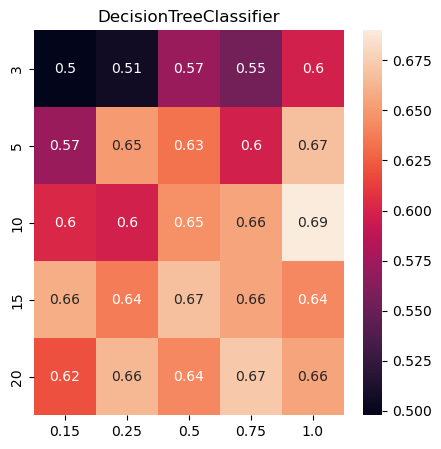

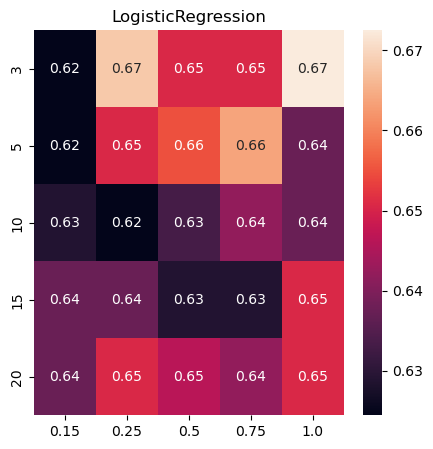

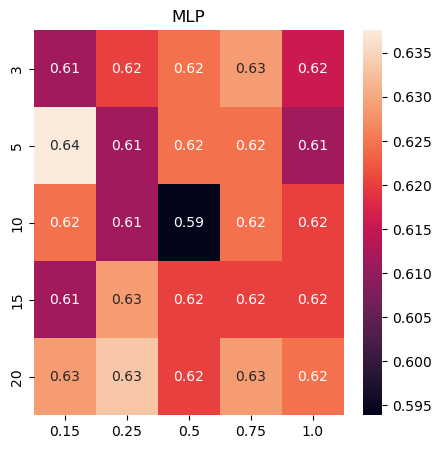

In [88]:
# plot a heat map for the accuracies obtained by each base estimator models across Fraction of Samples and Number of Estimators
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(acc_matrix[0], annot=True, ax=ax, xticklabels=sample_fraction, yticklabels=num_estimators)
ax.set_title('DecisionTreeClassifier')

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(acc_matrix[1], annot=True, ax=ax, xticklabels=sample_fraction, yticklabels=num_estimators)
ax.set_title('LogisticRegression')

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(acc_matrix[2], annot=True, ax=ax, xticklabels=sample_fraction, yticklabels=num_estimators)
ax.set_title('MLP')

plt.show()

DecisionTreeClassifier Accuracy: 55.45851528384279%
LogisticRegression Accuracy: 64.62882096069869%
MLP Accuracy: 62.44541484716157%


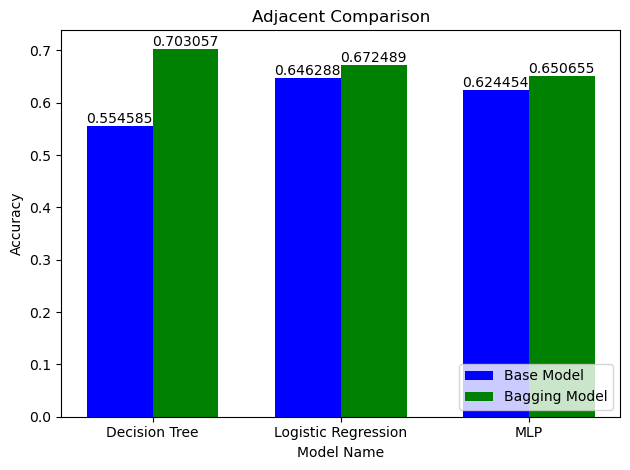

In [89]:
# DecisionTreeClassifier
base_classifier = DecisionTreeClassifier()
base_classifier.fit(X_train, y_train)
y_pred = base_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'DecisionTreeClassifier Accuracy: {accuracy_dt*100}%')

# LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'LogisticRegression Accuracy: {accuracy_lr*100}%')

# MLP
model = MLP_Classifier(n_inputs=X.shape[1], n_hidden=1, n_outputs=6, n_neuron=[3], lr=0.1, act_func='relu')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred)
print(f'MLP Accuracy: {accuracy_mlp*100}%')

# Compare the performance of each model with the best performing ensemble model of the same class with a single side-by-side histogram
fig, ax = plt.subplots()
width = 0.35
x = np.arange(3)


bars1 = ax.bar(x - width/2, [accuracy_dt,accuracy_lr,accuracy_mlp], width, label='Base Model', color='b')
bars2 = ax.bar(x + width/2, [best_accuracy_dt, best_accuracy_lr, best_accuracy_mlp], width, label='Bagging Model', color='g')

ax.set_xlabel('Model Name')
ax.set_ylabel('Accuracy')
ax.set_title('Adjacent Comparison')

ax.legend(loc='lower right')

ax.set_xticks(x)
ax.set_xticklabels(['Decision Tree', 'Logistic Regression', 'MLP'])
ax.bar_label(bars1)
ax.bar_label(bars2)

plt.tight_layout()

plt.show()


### Define Base Regressors

In [91]:
# class for linear regression 
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

    def compute_cost(self, X, y):
        m = len(y)
        predictions = np.dot(X, self.weights) + self.bias
        cost = 1/(2*m) * np.sum((predictions - y)**2)
        return cost

    def gradient_descent(self, X, y):
        m = len(y)
        # print(X.shape)
        # print(self.weights.shape)
        predictions = np.dot(X, self.weights) + self.bias

        # print(predictions.shape)
        y = y.reshape(-1, 1)
        delta = predictions - y
        # print(delta.shape)
        dw = 1/m * np.dot(X.T,delta)
        db = 1/m * np.sum(predictions - y)

        # print(dw.shape)
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        m, n = X.shape
        self.initialize_parameters(n)

        for _ in range(self.num_iterations):
            self.gradient_descent(X, y)

        return self

    def predict(self, X):
        predictions = np.dot(X, self.weights) + self.bias
        return predictions



In [92]:
# class for MLP regressor
import numpy as np
import pandas as pd

class MLP_Regression:
    def __init__(self, n_inputs, n_hidden, n_outputs, n_neuron, lr=0.01, act_func='relu'):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        self.n_neuron = n_neuron
        self.lr = lr
        self.act_func = act_func

        self.weights_with_bias = []

        # initialize weights 

        # input layer
        self.weights_with_bias.append(np.ones((self.n_inputs + 1, self.n_neuron[0])))

        # hidden layers
        for i in range(self.n_hidden-1):
            self.weights_with_bias.append(np.ones((self.n_neuron[i] + 1, self.n_neuron[i+1])))

        # output layer
        self.weights_with_bias.append(np.ones((self.n_neuron[n_hidden-1] + 1, self.n_outputs)))


        # divide all weights by 1000
        for i in range(len(self.weights_with_bias)):
            self.weights_with_bias[i] /= 1000


        # self.weights_with_bias = np.array(self.weights_with_bias)
        # print(self.weights_with_bias)
        # check if any nan in weights
        # for i in range(len(self.weights_with_bias)):    
        #     if np.isnan(self.weights_with_bias[i]).any():
        #         print(i)

    def fit(self, X, Y, epochs=1000):
        for i in range(epochs):
            # if i==0:
            #     print(self.weights_with_bias[0])
            a_values,z_values = self.forward_prop(X)
            self.backward_prop(Y, a_values, z_values)
            # if i==0:
            #     print(self.weights_with_bias[0])
            # if i % 1000 == 0:
            # print("Epoch: ", i, "Loss: ", self.loss(Y, a_values[-1]))
                # print("Weights: ", self.weights_with_bias[0][0])
        return self

    def predict(self, X):
        return self.forward_prop(X)[0][-1]
    
    def forward_prop(self, X):
        all_z_values = []
        all_a_values = []
        input_layer = np.insert(X, 0, 1, axis=1)
        all_z_values.append(X) 
        all_a_values.append(input_layer)
        for i in range(self.n_hidden):
            # if np.isnan(all_a_values[-1]).any():
            #     print(i,1)
            # if np.isnan(self.weights_with_bias[i]).any():
            #     print(i,2)
            z = np.dot(all_a_values[-1], self.weights_with_bias[i])
            a = self.activation(z)
            all_z_values.append(z) # insert bias column
            all_a_values.append(np.insert(a, 0, 1, axis=1))
        z = np.dot(all_a_values[-1], self.weights_with_bias[-1])
        a = self.activation(z)
        all_z_values.append(z)
        all_a_values.append(a)

        return all_a_values, all_z_values
    
    def backward_prop(self, Y, a_values, z_values):
        # calculate error and update weights simultaneously
        # self.outputs = []
        # self.outputs.append(output)
        Y = Y.reshape(-1,1)
        error = Y - a_values[-1]
        # print(a_values[-1])
        # print(error.shape, output.shape, z_values[-1].shape)
        for i in range(self.n_hidden, -1, -1):
            if i == self.n_hidden:
                delta = error * self.derivative(z_values[-1])
            else:
                # print(delta.shape, self.weights_with_bias[i+1][1:].shape,delta.shape, z_values[i+1][:,1:].shape)
                prod = np.dot(delta, self.weights_with_bias[i+1][1:].T)
                delta =  prod* self.derivative(z_values[i+1])
                # print(self.weights_with_bias[i+1][1:])
            # print(delta.shape, z_values[i].shape, self.weights_with_bias[i].shape)
            self.weights_with_bias[i] += self.lr * np.dot(a_values[i].T, delta)/len(Y)
            # self.outputs.append(delta)
        # self.outputs = self.outputs[::-1]

    def derivative(self, x):
        if self.act_func == 'sigmoid':
            return x * (1 - x)
        elif self.act_func == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.act_func == 'tanh':
            return 1 - np.square(x)
        
    def activation(self, x):
        if self.act_func == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.act_func == 'relu':
            return np.maximum(0, x)
        elif self.act_func == 'tanh':
            return np.tanh(x)
        
    def loss(self, Y, Y_pred):
        return np.mean(np.square(Y - Y_pred))
        

### Bagging regressor

In [93]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

class BaggingRegressor:
    def __init__(self, base_classifier_name, num_estimators, sample_fraction, bootstrap=True, voting='hard'):
        self.base_classifier_name = base_classifier_name
        self.num_estimators = num_estimators
        self.sample_fraction = sample_fraction
        self.bootstrap = bootstrap
        self.voting = voting
        self.models = []

    def fit(self, X, y):
        self.no_of_inputs = X.shape[1]
        for _ in range(self.num_estimators):
            if self.base_classifier_name == "DecisionTreeRegressor":
                self.base_classifier = DecisionTreeRegressor()
            elif self.base_classifier_name == "LinearRegression":
                self.base_classifier =  LinearRegression()
            elif self.base_classifier_name == "MLP":
                self.base_classifier = MLP_Regression(n_inputs=self.no_of_inputs  , n_hidden=1, n_outputs=1, n_neuron=[3], lr=0.01, act_func='relu')
            X_sample, y_sample = self.bootstrap_sample(X, y)
            base_model = self.base_classifier.fit(X_sample, y_sample)
            self.models.append(base_model)

    def predict(self, X,val_X,val_y):
        predictions = []
        all_model_mse = []

        for model in self.models:
            y_pred = model.predict(X) 
            predictions.append(y_pred)
            # if(self.base_classifier_name == "MLP"):
            #     print(model.predict(val_X))
            # mse = mean_squared_error(val_y, model.predict(val_X))
            mse = np.mean(np.square(val_y - model.predict(val_X)))
            all_model_mse.append(mse)

        predictions = np.array(predictions) # (num_estimators, num_samples)

        if self.voting == 'hard':
            # Hard voting
            final_predictions = np.apply_along_axis(lambda x: np.mean(x), axis=0, arr=predictions) 
        else:
            # take weighted average of predictions w.r.t mse of each model 
            final_predictions = np.average(predictions, axis=0, weights=all_model_mse)
        return final_predictions

    def bootstrap_sample(self, X, y):
        if self.bootstrap:
            # Sampling with replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))
        else:
            # Sampling without replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))

        return X_sample, y_sample


### Regression Report

In [95]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
housing_data = pd.read_csv('HousingData.csv')
columns = housing_data.columns

housing_data = np.array(housing_data)

# replace NA values with mean of column
for i in range(housing_data.shape[1]):
    housing_data[np.isnan(housing_data[:,i]),i] = np.nanmean(housing_data[:,i])

X = housing_data[:, :-1]
y = housing_data[:, -1]

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, val and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

### Hyperparameter Tuning for Bagging Regressor

In [96]:
# Hyperparameter tuning
base_estimators = ["DecisionTreeRegressor", "LinearRegression", "MLP"]
num_estimators = range(1, 11)
sample_fraction = [0.15,0.25,0.5, 0.75, 1.0]
bootstrap = [True, False]
voting = ['hard', 'soft']

best_mse = np.inf
best_estimator = None
best_num_estimators = None
best_sample_fraction = None
best_bootstrap = None
best_voting = None

best_mse_dt = 10000000
best_mse_lr = 10000000
best_mse_mlp = 10000000

# Iterate over all combinations of hyperparameters
for base_estimator in base_estimators:
    for n_estimators in num_estimators:
        for frac in sample_fraction:
            for boot in bootstrap:
                for vote in voting:
                    # print(base_estimator, n_estimators, frac, boot, vote, accuracy)
                    # Create and fit the BaggingClassifier
                    bagging_regressor = BaggingRegressor(base_estimator, n_estimators, frac, boot, vote)
                    bagging_regressor.fit(X_train, y_train)

                    # Make predictions on the test set
                    y_pred = bagging_regressor.predict(X_test,X_val,y_val)

                    # Evaluate the model
                    mse = mean_squared_error(y_test, y_pred)

                    if mse < best_mse:
                        best_mse = mse
                        best_estimator = base_estimator
                        best_num_estimators = n_estimators
                        best_sample_fraction = frac
                        best_bootstrap = boot
                        best_voting = vote

                    if base_estimator == "DecisionTreeRegressor" and mse < best_mse_dt:
                        best_mse_dt = mse

                    if base_estimator == "LinearRegression" and mse < best_mse_lr:
                        best_mse_lr = mse

                    if base_estimator == "MLP" and mse < best_mse_mlp:
                        best_mse_mlp = mse

print(f'Best MSE: {best_mse}')
print(f'Best base estimator: {best_estimator}')
print(f'Best number of estimators: {best_num_estimators}')
print(f'Best sample fraction: {best_sample_fraction}')
print(f'Best bootstrap: {best_bootstrap}')
print(f'Best voting: {best_voting}')


Best MSE: 8.36865490196078
Best base estimator: DecisionTreeRegressor
Best number of estimators: 5
Best sample fraction: 1.0
Best bootstrap: True
Best voting: hard


DecisionTreeRegressor MSE: 24.916960784313726
LinearRegression MSE: 26.38817483601434
MLP MSE: 42.003682486399704


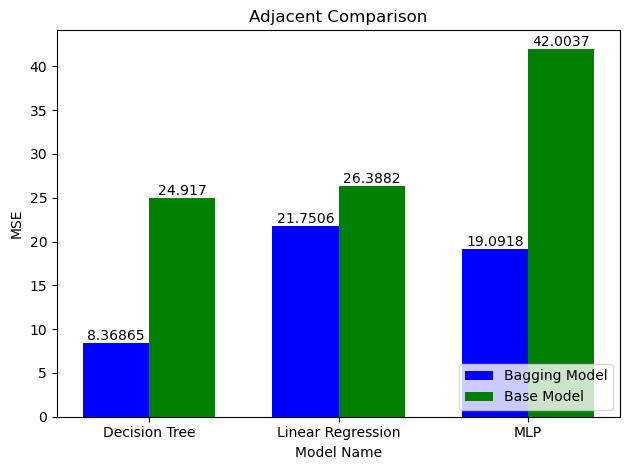

In [99]:
# decision tree
base_regressor = DecisionTreeRegressor()
base_regressor.fit(X_train, y_train)
y_pred = base_regressor.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred)
print(f'DecisionTreeRegressor MSE: {mse_dt}')

# LinearRegression
base_regressor = LinearRegression()
base_regressor.fit(X_train, y_train)
y_pred = base_regressor.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
print(f'LinearRegression MSE: {mse_lr}')

# MLP
base_regressor = MLP_Regression(n_inputs=X.shape[1], n_hidden=3, n_outputs=1, n_neuron=[10, 9, 5], lr=0.001, act_func='relu')
base_regressor.fit(X_train, y_train)
y_pred = base_regressor.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred)
print(f'MLP MSE: {mse_mlp}')

# plot histogram
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
width = 0.35

x = np.arange(3)
bars1 = ax.bar(x - width/2, [best_mse_dt, best_mse_lr, best_mse_mlp], width, label='Bagging Model', color='b')
bars2 = ax.bar(x + width/2, [mse_dt, mse_lr, mse_mlp], width, label='Base Model', color='g')

ax.set_xlabel('Model Name')
ax.set_ylabel('MSE')
ax.set_title('Adjacent Comparison')

ax.legend(loc='lower right')

ax.set_xticks(x)
ax.set_xticklabels(['Decision Tree', 'Linear Regression', 'MLP'])
ax.bar_label(bars1)
ax.bar_label(bars2)

plt.tight_layout()

plt.show()

## 3.3.1 - Stacking

### Classification

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

import pandas as pd


# Load the Wine dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data = wine_data.drop(["Id"],axis=1)
colums = wine_data.columns
wine_data.head()
wine_data = np.array(wine_data)

X = wine_data[:, :-1]
y = wine_data[:, -1] - 3

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models and meta model
base_models = [DecisionTreeClassifier(), MLP_Classifier(n_inputs=X_train.shape[1] , n_hidden=1, n_outputs=6, n_neuron=[3], lr=0.1, act_func='relu'), LogisticRegression()]
meta_model = LogisticRegression()

# K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

base_model1_predictions = []
base_model2_predictions = []
base_model3_predictions = []
actuals = []
for train_index, test_index in kfold.split(X_train):
    # Split the data into training and testing sets
    X_train_kfold, X_test_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_test_kfold = y_train[train_index], y_train[test_index]

    # train the base models on the training set
    base_model1 = base_models[0]
    base_model1.fit(X_train_kfold, y_train_kfold)
    base_model1_predictions.append(base_model1.predict(X_test_kfold))

    base_model2 = base_models[1]
    base_model2.fit(X_train_kfold, y_train_kfold)
    base_model2_predictions.append(base_model2.predict(X_test_kfold))

    base_model3 = base_models[2]
    base_model3.fit(X_train_kfold, y_train_kfold)
    base_model3_predictions.append(base_model3.predict(X_test_kfold))

    actuals.append(y_test_kfold)

base_model1_predictions = np.concatenate(base_model1_predictions)
base_model2_predictions = np.concatenate(base_model2_predictions)
base_model3_predictions = np.concatenate(base_model3_predictions)
y_train_meta_model = np.concatenate(actuals)

# Concatenate the predictions of all base models for each fold to form nx3 matrix
X_train_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)

# Fit the meta model on the concatenated predictions
meta_model.fit(X_train_meta_model, y_train_meta_model)

# Make predictions on the test set
base_model1 = base_models[0]
base_model1.fit(X_train, y_train)
base_model1_predictions = base_model1.predict(X_test)

base_model2 = base_models[1]
base_model2.fit(X_train, y_train)
base_model2_predictions = base_model2.predict(X_test)

base_model3 = base_models[2]
base_model3.fit(X_train, y_train)
base_model3_predictions = base_model3.predict(X_test)

X_test_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)
meta_model_predictions = meta_model.predict(X_test_meta_model)

# Evaluate the model
accuracy = accuracy_score(y_test, meta_model_predictions)
print(f'StackingClassifier Accuracy: {accuracy*100}%')

StackingClassifier Accuracy: 60.26200873362445%


In [45]:
# test with inbuilt stacking classifier
from sklearn.ensemble import StackingClassifier as StackingClassifier_sklearn
from sklearn.linear_model import LogisticRegression

# Define base models and meta model
base_models = [('dt', DecisionTreeClassifier()), ('mlp', MLPClassifier()), ('lr', LogisticRegression())]
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier_sklearn(base_models, meta_model)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Inbuilt Stacking Classifier Accuracy: {accuracy*100}%')

/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yatharth-g

Inbuilt Stacking Classifier Accuracy: 58.951965065502186%


/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iter

best accuracy for bagging is around 70% 
best accuracy for staking is around 60% 

### Regression

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import pandas as pd


# Load the Housing dataset
housing_data = pd.read_csv('HousingData.csv')
columns = housing_data.columns

housing_data = np.array(housing_data)

# replace NA values with mean of column
for i in range(housing_data.shape[1]):
    housing_data[np.isnan(housing_data[:,i]),i] = np.nanmean(housing_data[:,i])

X = housing_data[:, :-1]
y = housing_data[:, -1]

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define base models and meta model
base_models = [DecisionTreeRegressor(), MLP_Regression(n_inputs=X_train.shape[1] , n_hidden=1, n_outputs=1, n_neuron=[3], lr=0.01, act_func='relu'), LinearRegression()]
meta_model = DecisionTreeRegressor()

# K-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

base_model1_predictions = []
base_model2_predictions = []
base_model3_predictions = []
actuals = []
for train_index, test_index in kfold.split(X_train):
    # Split the data into training and testing sets
    X_train_kfold, X_test_kfold = X_train[train_index], X_train[test_index]
    y_train_kfold, y_test_kfold = y_train[train_index], y_train[test_index]

    # train the base models on the training set
    base_model1 = base_models[0]
    base_model1.fit(X_train_kfold, y_train_kfold)
    base_model1_predictions.append(base_model1.predict(X_test_kfold))

    base_model2 = base_models[1]
    base_model2.fit(X_train_kfold, y_train_kfold)
    base_model2_predictions.append(base_model2.predict(X_test_kfold))

    base_model3 = base_models[2]
    base_model3.fit(X_train_kfold, y_train_kfold)
    base_model3_predictions.append(base_model3.predict(X_test_kfold))

    actuals.append(y_test_kfold)


base_model1_predictions = np.concatenate(base_model1_predictions)
base_model2_predictions = np.concatenate(base_model2_predictions)
base_model3_predictions = np.concatenate(base_model3_predictions)
y_train_meta_model = np.concatenate(actuals)

# Concatenate the predictions of all base models for each fold to form nx3 matrix
X_train_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)
# print true or false if nan in X_train_meta_model
print(np.isnan(X_train_meta_model).any())

# Fit the meta model on the concatenated predictions
meta_model.fit(X_train_meta_model, y_train_meta_model)

# Make predictions on the test set
base_model1 = base_models[0]
base_model1.fit(X_train, y_train)

base_model2 = base_models[1]
base_model2.fit(X_train, y_train)

base_model3 = base_models[2]
base_model3.fit(X_train, y_train)

X_test_meta_model = np.concatenate((np.array(base_model1.predict(X_test)).reshape(-1, 1), np.array(base_model2.predict(X_test)).reshape(-1, 1), np.array(base_model3.predict(X_test)).reshape(-1, 1)), axis=1)
print(np.isnan(X_test_meta_model).any())
# X_test_meta_model = np.log1p(X_test_meta_model)
meta_model_predictions = meta_model.predict(X_test_meta_model)

# Check for NaN values
nan_indices_meta_model = np.where(np.isnan(meta_model_predictions))[0]
nan_indices_y_test = np.where(np.isnan(y_test))[0]

# # Remove entries with NaN values
# meta_model_predictions = np.delete(meta_model_predictions, nan_indices_meta_model)
# y_test = np.delete(y_test, nan_indices_meta_model)
# meta_model_predictions = np.delete(meta_model_predictions, nan_indices_y_test)
# y_test = np.delete(y_test, nan_indices_y_test)
print(len(meta_model_predictions),len(nan_indices_meta_model))


# Evaluate the model
mse = mean_squared_error(y_test, meta_model_predictions)
print(f'StackingRegressor MSE: {mse}')


False
False
102 0
StackingRegressor MSE: 26.492352941176474


## 3.3.2 - Blending

### Classification

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

import pandas as pd


# Load the Wine dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data = wine_data.drop(["Id"],axis=1)
colums = wine_data.columns
wine_data.head()
wine_data = np.array(wine_data)

X = wine_data[:, :-1]
y = wine_data[:, -1] - 3

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define base models and meta model
base_models = [DecisionTreeClassifier(), MLP_Classifier(n_inputs=X_train.shape[1] , n_hidden=1, n_outputs=6, n_neuron=[3], lr=0.1, act_func='relu'), LogisticRegression()]
meta_model = LogisticRegression()

# train the base models on the training set
base_model1 = base_models[0]
base_model1.fit(X_train, y_train)

base_model2 = base_models[1]
base_model2.fit(X_train, y_train)

base_model3 = base_models[2]
base_model3.fit(X_train, y_train)

# Make predictions on the validation set
base_model1_predictions = base_model1.predict(X_val)
base_model2_predictions = base_model2.predict(X_val)
base_model3_predictions = base_model3.predict(X_val)

# Concatenate the predictions of all base models for each fold to form nx3 matrix
X_val_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)

# Fit the meta model on the concatenated predictions
meta_model.fit(X_val_meta_model, y_val)

# Make predictions on the test set
base_model1_predictions = base_model1.predict(X_test)
base_model2_predictions = base_model2.predict(X_test)
base_model3_predictions = base_model3.predict(X_test)

X_test_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)
meta_model_predictions = meta_model.predict(X_test_meta_model)

# Evaluate the model
accuracy = accuracy_score(y_test, meta_model_predictions)
print(f'BlendingClassifier Accuracy: {accuracy*100}%')

BlendingClassifier Accuracy: 64.62882096069869%


In [52]:
# test with inbuilt blending classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models and meta model
base_models = [('dt', DecisionTreeClassifier()), ('mlp', MLPClassifier()), ('lr', LogisticRegression())]
meta_model = DecisionTreeClassifier()

# Create the stacking classifier
blending_classifier = VotingClassifier(base_models, voting='soft')

# Train the stacking classifier
blending_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = blending_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Inbuilt Blending Classifier Accuracy: {accuracy*100}%')


Inbuilt Blending Classifier Accuracy: 61.135371179039296%


/home/yatharth-gupta/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Regression

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import pandas as pd


# Load the Housing dataset
housing_data = pd.read_csv('HousingData.csv')
columns = housing_data.columns

housing_data = np.array(housing_data)

# replace NA values with mean of column
for i in range(housing_data.shape[1]):
    housing_data[np.isnan(housing_data[:,i]),i] = np.nanmean(housing_data[:,i])

X = housing_data[:, :-1]
y = housing_data[:, -1]

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define base models and meta model
base_models = [DecisionTreeRegressor(), MLP_Regression(n_inputs=X_train.shape[1] , n_hidden=1, n_outputs=1, n_neuron=[3], lr=0.01, act_func='relu'), LinearRegression()]
meta_model = DecisionTreeRegressor()

# train the base models on the training set
base_model1 = base_models[0]
base_model1.fit(X_train, y_train)

base_model2 = base_models[1]
base_model2.fit(X_train, y_train)

base_model3 = base_models[2]
base_model3.fit(X_train, y_train)

# Make predictions on the validation set
base_model1_predictions = base_model1.predict(X_val)
base_model2_predictions = base_model2.predict(X_val)
base_model3_predictions = base_model3.predict(X_val)

# Concatenate the predictions of all base models for each fold to form nx3 matrix
X_val_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)

# Fit the meta model on the concatenated predictions
meta_model.fit(X_val_meta_model, y_val)

# Make predictions on the test set
base_model1_predictions = base_model1.predict(X_test)
base_model2_predictions = base_model2.predict(X_test)
base_model3_predictions = base_model3.predict(X_test)

X_test_meta_model = np.concatenate((np.array(base_model1_predictions).reshape(-1, 1), np.array(base_model2_predictions).reshape(-1, 1), np.array(base_model3_predictions).reshape(-1, 1)), axis=1)
meta_model_predictions = meta_model.predict(X_test_meta_model)

# Evaluate the model
mse = mean_squared_error(y_test, meta_model_predictions)
print(f'BlendingRegressor MSE: {mse}')

BlendingRegressor MSE: 18.496372549019608
